In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
data = {
    'Name': ['A', 'B', 'C', 'D', 'A'],
    'Age': [19, 20, 18, np.nan, 19],
    'Salary': [20000, 44500, np.nan, 80000, 20000]
}
df = pd.DataFrame(data)
print("Dataset:\n", df, "\n")

Dataset:
   Name   Age   Salary
0    A  19.0  20000.0
1    B  20.0  44500.0
2    C  18.0      NaN
3    D   NaN  80000.0
4    A  19.0  20000.0 



In [ ]:
dups = df[df.duplicated()]
print("Duplicate Rows:\n", dups, "\n")

df = df.drop_duplicates()
print("After Removing Duplicates:\n", df, "\n")

Duplicate Rows:
   Name   Age   Salary
4    A  19.0  20000.0 

After Removing Duplicates:
   Name   Age   Salary
0    A  19.0  20000.0
1    B  20.0  44500.0
2    C  18.0      NaN
3    D   NaN  80000.0 



In [ ]:
df[['Age', 'Salary']] = df[['Age', 'Salary']].fillna(df[['Age', 'Salary']].mean())
print("After Handling Missing Values (using Mean):\n", df, "\n")

After Handling Missing Values (using Mean):
   Name   Age        Salary
0    A  19.0  20000.000000
1    B  20.0  44500.000000
2    C  18.0  48166.666667
3    D  19.0  80000.000000 



In [ ]:
cols = ['Age', 'Salary']

scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[cols] = scaler.fit_transform(df_minmax[cols])
print("After Min-Max Scaling:\n", df_minmax, "\n")

After Min-Max Scaling:
   Name  Age    Salary
0    A  0.5  0.000000
1    B  1.0  0.408333
2    C  0.0  0.469444
3    D  0.5  1.000000 



In [ ]:
scaler_std = StandardScaler()
df_std = df.copy()
df_std[cols] = scaler_std.fit_transform(df_std[cols])
print("After Standard Scaling:\n", df_std, "\n")

After Standard Scaling:
   Name       Age    Salary
0    A  0.000000 -1.320413
1    B  1.414214 -0.171888
2    C -1.414214  0.000000
3    D  0.000000  1.492301 



In [ ]:
print("Measures of Central Tendency and Dispersion:\n")
for col in cols:
    print(f"{col}")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])
    print("Variance:", df[col].var())
    print("Standard Deviation:", df[col].std())
    print("Range:", df[col].max() - df[col].min())
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    print("Interquartile Range (IQR):", Q3 - Q1, "\n")

Measures of Central Tendency and Dispersion:

Age
Mean: 19.0
Median: 19.0
Mode: 19.0
Variance: 0.6666666666666666
Standard Deviation: 0.816496580927726
Range: 2.0
Interquartile Range (IQR): 0.5 

Salary
Mean: 48166.666666666664
Median: 46333.33333333333
Mode: 20000.0
Variance: 606722222.2222222
Standard Deviation: 24631.732018317798
Range: 60000.0
Interquartile Range (IQR): 17750.0 



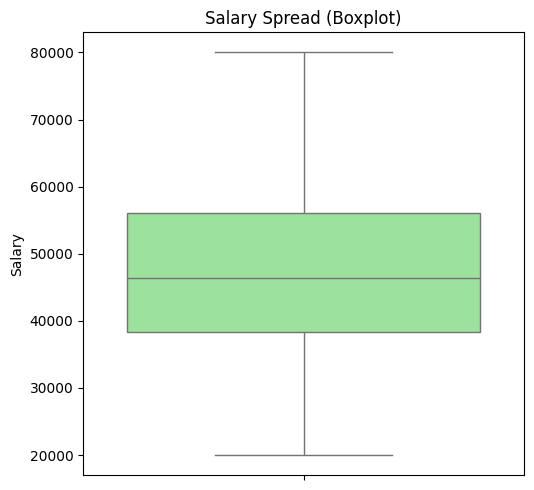

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.boxplot(y=df['Salary'], color='lightgreen')
plt.title("Salary Spread (Boxplot)")

plt.tight_layout()
plt.show()

In [ ]:
data2 = {
    'Name':['A', 'B', 'C', '000000000D', 'E', 'F', 'G', 'H'],
    'Gender':['Male', 'F', 'M', 'Female', 'M', 'male', 'female', 'M']
}
df2 = pd.DataFrame(data2)
print("Original Gender Data:\n", df2, "\n")

Original Gender Data:
          Name  Gender
0           A    Male
1           B       F
2           C       M
3  000000000D  Female
4           E       M
5           F    male
6           G  female
7           H       M 



In [ ]:
df2['Gender'] = df2['Gender'].str.lower().str.strip()
df2['Gender'] = df2['Gender'].replace({
    'm': 'Male',
    'male': 'Male',
    'f': 'Female',
    'female': 'Female'
})
print("Cleaned Gender Data:\n", df2, "\n")

Cleaned Gender Data:
          Name  Gender
0           A    Male
1           B  Female
2           C    Male
3  000000000D  Female
4           E    Male
5           F    Male
6           G  Female
7           H    Male 

